In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Подготовка данных:
проверка на наличие пропусков.
Два когортных анализа:
- для количества покупателей (user id);
- для сумм их покупок.
Ответы на вопросы:
Что необычного вы заметили?
Есть ли выбивающиеся когорты?
У каких когорт лучшая возвращаемость клиентов, а у каких худшая?
Что стоило бы ещё исследовать внимательнее на других данных?

In [ ]:
data = pd.read_excel('Когортный анализ.xlsx')
data.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704840 entries, 0 to 704839
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  704840 non-null  object        
 1   date     704840 non-null  datetime64[ns]
 2   price    704840 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.1+ MB


In [ ]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day


data['month_year']=data['date'].apply(get_month)

data['cohortMonth']=data.groupby('user_id')['month_year'].transform('min')

date_year,date_month,_ = get_date(data,'date')
cohort_year,cohort_month,_ = get_date(data,'cohortMonth')
year_diff=date_year-cohort_year
month_diff=date_month-cohort_month

data['cohort_index']=year_diff*12+month_diff+1

data.head(50)

,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1
5,A0005,2020-03-31,50,2020-03-01,2020-03-01,1
6,A0005,2020-03-31,40,2020-03-01,2020-03-01,1
7,A0005,2020-04-01,100,2020-04-01,2020-03-01,2
8,A0005,2020-04-02,40,2020-04-01,2020-03-01,2
9,A0005,2020-04-04,70,2020-04-01,2020-03-01,2


In [ ]:
data1=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=len)

In [ ]:
data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN
2020-06-01,11304.0,9783.0,6793.0,6603.0,6294.0,5182.0,4710.0,4241.0,808.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,17007.0,11428.0,8432.0,8273.0,7204.0,6673.0,6218.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13458.0,10518.0,7241.0,7070.0,6935.0,5753.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17781.0,12152.0,8846.0,8656.0,7829.0,1493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
first_column1=data1.iloc[:,0]
retention1=data1.div(first_column1,axis=0)
retention1.round(2)



cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.82,0.71,0.66,0.62,0.51,0.47,0.43,0.41,0.42,0.38,0.38,0.36,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.59,0.56,0.45,0.43,0.38,0.35,0.35,0.33,0.07,NaN,NaN
2020-04-01,1.0,0.86,0.62,0.59,0.57,0.41,0.37,0.33,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.72,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.60,0.58,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.67,0.50,0.49,0.42,0.39,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.78,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.68,0.50,0.49,0.44,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='price',
                      aggfunc=len)

In [ ]:
data2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN
2020-06-01,11304.0,9783.0,6793.0,6603.0,6294.0,5182.0,4710.0,4241.0,808.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,17007.0,11428.0,8432.0,8273.0,7204.0,6673.0,6218.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13458.0,10518.0,7241.0,7070.0,6935.0,5753.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17781.0,12152.0,8846.0,8656.0,7829.0,1493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


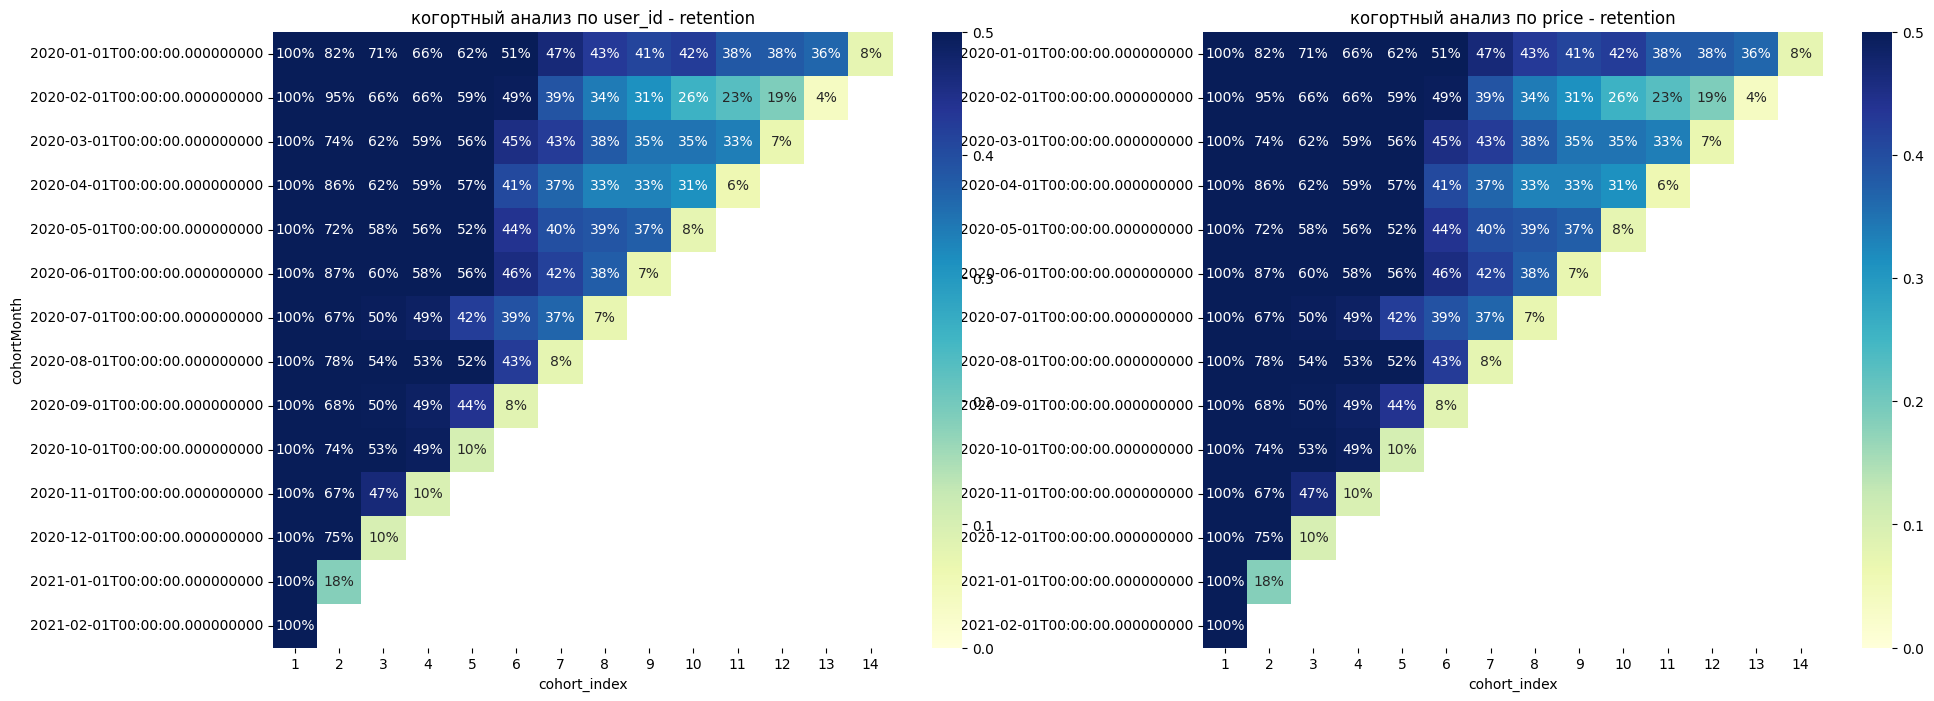

In [ ]:
first_column2=data2.iloc[:,0]
retention2=data2.div(first_column2,axis=0)
retention2.round(2)

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

plt.title('когортный анализ')
sns.heatmap(data=retention1,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu",
           ax=axs[0])
axs[0].set_title('когортный анализ по user_id - retention')

sns.heatmap(data=retention2,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu",
           ax=axs[1])
axs[1].set_title('когортный анализ по price - retention')

plt.show()


 У каких когорт лучшая возвращаемость клиентов, а у каких худшая?

В результате когортного анализа, данные по клиентам (user_id) и суммам покупок одинаковая. В ноябре 2020 года клиенты сильно понижаются почти на 40%, что является худшим когортом. А в других годах и месяцах таких сильных изменении не видно. Февраль 2020года показывает наилучший когорт, так как 95% новых клиентов.